In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Data Collection & Analysis

In [3]:
# load csv file into pandas dataframe
customer=pd.read_csv('Mall_Customers.csv')

In [9]:
print(customer.head())
print(customer.shape)
print(customer.info())
print(customer.isnull().sum())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Cho0se Features

In [11]:
X= customer.iloc[:,[3,4]].values
print(X)



[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

Choose number of clusters

WCSS- Within Cluster sum of Squares (Elbow Method)


WCSS (Within-Cluster Sum of Squares) is a method used to evaluate the quality of a clustering algorithm. It measures the total sum of squared distances between the each point and its assigned centroid within each cluster. The goal of clustering is to minimize the WCSS value, which means that each point should be as close to its assigned centroid as possible.

In the K-means clustering algorithm, WCSS is used to determine the optimal number of clusters. The algorithm tries to minimize the WCSS by iteratively adjusting the centroid positions and reassigning points to the nearest centroid until the WCSS converges.

The elbow method is commonly used to determine the optimal number of clusters in K-means clustering based on the WCSS values. The elbow method involves plotting the WCSS values for different numbers of clusters and selecting the number of clusters at the "elbow point", which is the point where the rate of decrease in WCSS starts to level off. This indicates that the addition of more clusters will not significantly reduce the WCSS.

In [18]:
wcss=[]
for i in range(1,11):
    kmeans= KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

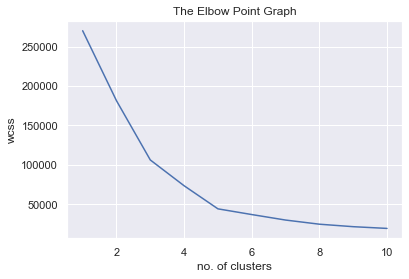

In [19]:
# plot an Elbow graph


sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('no. of clusters')
plt.ylabel('wcss')
plt.show()

sudden drop at 3 and 5. After 5 no significant drop. Therefore optimum no. of clusters=5

Training K-Means Clustering Model

In [20]:
kmeans= KMeans(n_clusters=5, init='k-means++',random_state=0)
'''k-means++ is a method for choosing the initial centroids (starting points) in the k-means clustering algorithm. The standard k-means algorithm chooses the initial centroids randomly from the data points, which can result in suboptimal clustering solutions. k-means++ addresses this issue by using a smarter initialization strategy.

The k-means++ algorithm works as follows:

Choose the first centroid randomly from the data points.
For each remaining centroid, compute the distance from each data point to the nearest centroid that has already been chosen. The probability of selecting a data point as the next centroid is proportional to the square of this distance.
Choose the next centroid randomly from the data points, using the probabilities computed in step 2.
Repeat steps 2-3 until all centroids have been chosen.
By using this initialization strategy, k-means++ tends to find better clusterings than the standard k-means algorithm.'''

# return a label for each data point based on their respective Cluster
Y = kmeans.fit_predict(X)
print(Y)

'''Alternate way 
labels = kmeans.labels_

# Plot the scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s=50, c='violet', label='Cluster 3')
plt.scatter(X[labels == 3, 0], X[labels == 3, 1], s=50, c='blue', label='Cluster 4')
plt.scatter(X[labels == 4, 0], X[labels == 4, 1], s=50, c='orange', label='Cluster 5')
'''

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


c:\Users\alok\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Both kmeans.fit_predict() and kmeans.labels_ are used to get the cluster labels for the input data after clustering with k-means. However, the main difference between them is the way they return the labels.

kmeans.fit_predict() performs both fitting and prediction in a single step, meaning that it trains the k-means model on the input data and returns the cluster labels for each sample in one step. It is equivalent to calling kmeans.fit(X) and then kmeans.predict(X).

kmeans.labels_, on the other hand, only returns the cluster labels for the input data after fitting the k-means model on the input data using kmeans.fit(X). It does not perform prediction like kmeans.fit_predict().

In summary, kmeans.fit_predict() is a shorthand way to fit the k-means model and get the cluster labels for the input data in a single step, while kmeans.labels_ only returns the cluster labels after fitting the model separately.

Visualising all the Clusters

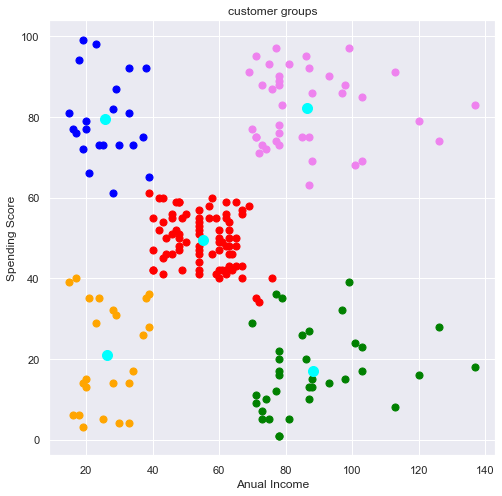

In [23]:
# x= annual Income y= spending score

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s= 50,c='green',label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s= 50,c='red',label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s= 50,c='violet',label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s= 50,c='blue',label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s= 50,c='orange',label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c='cyan',label='Centroids')

plt.title('customer groups')
plt.xlabel('Anual Income')
plt.ylabel('Spending Score')
plt.show()


The plot seems to show the clustering of customers based on their annual income and spending score. It looks like there are 5 distinct clusters that have been identified by the k-means algorithm. The centroids are marked in cyan color.

Each cluster represents a group of customers with similar characteristics. The green cluster represents customers with low income and low spending score, the red cluster represents customers with high income and high spending score, the violet cluster represents customers with moderate income and moderate spending score, the blue cluster represents customers with high income but low spending score, and the orange cluster represents customers with low income but high spending score.

This information can be useful for marketing campaigns and customer segmentation strategies. For example, a marketing campaign targeting high-income customers with high spending score can be tailored specifically to that group, while a separate campaign can be created for customers with low income and low spending score.